## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

## Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import the requests library.
import requests

## Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d3fe34a1634f05652b89a64616ae194


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   


Processing Record 1 of Set 1 | auki
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | lazaro cardenas
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | talcahuano
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | makakilo city
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | barranca
Processing Record 14 of Set 1 | velingara
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | melilla
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | ayagoz
Processing Record 22 of Set 1 | vanderhoof
Processing Record 23 of Set 1 | hilo
Processing Record 24 of Set 1 | sayyan
Processing Reco

Processing Record 39 of Set 4 | buqayq
City not found. Skipping...
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | edirne
Processing Record 42 of Set 4 | coihaique
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | sioux lookout
Processing Record 46 of Set 4 | jurm
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | chulman
Processing Record 49 of Set 4 | floro
Processing Record 50 of Set 4 | winnipeg
Processing Record 1 of Set 5 | ponta pora
Processing Record 2 of Set 5 | hagenow
Processing Record 3 of Set 5 | alexandria
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | kholtoson
Processing Record 6 of Set 5 | jadu
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | burica
City not found. Skipping...
Processing Record 9 of Set 5 | usinsk
Processing Record 10 of Set 5 | cuiluan
Processing Record 11 of Set 

Processing Record 23 of Set 8 | beyla
Processing Record 24 of Set 8 | chokurdakh
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | dickinson
Processing Record 27 of Set 8 | san lorenzo
Processing Record 28 of Set 8 | banda aceh
Processing Record 29 of Set 8 | upernavik
Processing Record 30 of Set 8 | fuzhou
Processing Record 31 of Set 8 | havre-saint-pierre
Processing Record 32 of Set 8 | kawambwa
Processing Record 33 of Set 8 | rawson
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | vieste
Processing Record 36 of Set 8 | bardiyah
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | tautira
Processing Record 40 of Set 8 | tambo grande
Processing Record 41 of Set 8 | lata
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | puerto del rosario
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | takoradi
Processing Record 46 of Set 8 | o

Processing Record 15 of Set 12 | carlyle
Processing Record 16 of Set 12 | cabedelo
Processing Record 17 of Set 12 | magdagachi
Processing Record 18 of Set 12 | babati
Processing Record 19 of Set 12 | kusk
City not found. Skipping...
Processing Record 20 of Set 12 | nabire
Processing Record 21 of Set 12 | whitehorse
Processing Record 22 of Set 12 | chicama
Processing Record 23 of Set 12 | sibenik
Processing Record 24 of Set 12 | ospitaletto
Processing Record 25 of Set 12 | clyde river
Processing Record 26 of Set 12 | el badari
City not found. Skipping...
Processing Record 27 of Set 12 | xining
Processing Record 28 of Set 12 | xiaoweizhai
Processing Record 29 of Set 12 | marrakesh
Processing Record 30 of Set 12 | birmitrapur
Processing Record 31 of Set 12 | nyurba
Processing Record 32 of Set 12 | geraldton
Processing Record 33 of Set 12 | vao
Processing Record 34 of Set 12 | kenora
Processing Record 35 of Set 12 | taybad
Processing Record 36 of Set 12 | launceston
Processing Record 37 of

In [10]:
len(city_data)

552

## Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Auki,-8.7676,160.7034,80.44,83,100,2.26,SB,2021-04-21 06:53:31
1,Hermanus,-34.4187,19.2345,62.01,89,73,7.00,ZA,2021-04-21 06:53:31
2,Hithadhoo,-0.6000,73.0833,82.81,63,8,4.12,MV,2021-04-21 06:48:59
3,Lazaro Cardenas,17.9583,-102.2000,69.82,70,2,3.74,MX,2021-04-21 06:53:32
4,Jamestown,42.0970,-79.2353,33.01,93,90,11.50,US,2021-04-21 06:52:43
5,Talcahuano,-36.7167,-73.1167,57.20,94,75,7.54,CL,2021-04-21 06:50:15
6,Hobart,-42.8794,147.3294,55.40,41,40,17.27,AU,2021-04-21 06:51:35
7,Puerto Ayora,-0.7393,-90.3518,75.00,98,96,3.60,EC,2021-04-21 06:53:33
8,Chuy,-33.6971,-53.4616,66.52,72,0,11.86,UY,2021-04-21 06:53:33
9,Mataura,-46.1927,168.8643,48.00,95,100,4.00,NZ,2021-04-21 06:53:33


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Auki,SB,2021-04-21 06:53:31,-8.7676,160.7034,80.44,83,100,2.26
1,Hermanus,ZA,2021-04-21 06:53:31,-34.4187,19.2345,62.01,89,73,7.00
2,Hithadhoo,MV,2021-04-21 06:48:59,-0.6000,73.0833,82.81,63,8,4.12
3,Lazaro Cardenas,MX,2021-04-21 06:53:32,17.9583,-102.2000,69.82,70,2,3.74
4,Jamestown,US,2021-04-21 06:52:43,42.0970,-79.2353,33.01,93,90,11.50
5,Talcahuano,CL,2021-04-21 06:50:15,-36.7167,-73.1167,57.20,94,75,7.54
6,Hobart,AU,2021-04-21 06:51:35,-42.8794,147.3294,55.40,41,40,17.27
7,Puerto Ayora,EC,2021-04-21 06:53:33,-0.7393,-90.3518,75.00,98,96,3.60
8,Chuy,UY,2021-04-21 06:53:33,-33.6971,-53.4616,66.52,72,0,11.86
9,Mataura,NZ,2021-04-21 06:53:33,-46.1927,168.8643,48.00,95,100,4.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Scatter Plots of Weather Data

### Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Scatter Plot for Latitude vs. Max Temperature

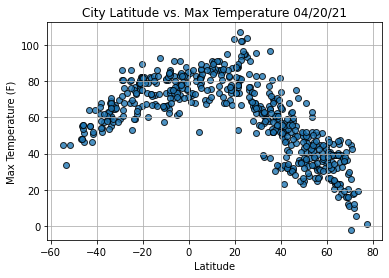

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Scatter Plot for Latitude vs. Humidity

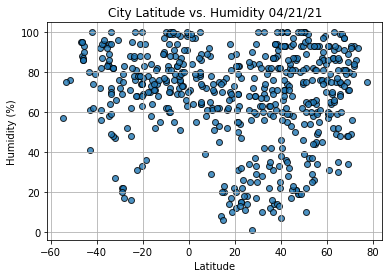

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#### Scatter Plot for Latitude vs Cloudiness

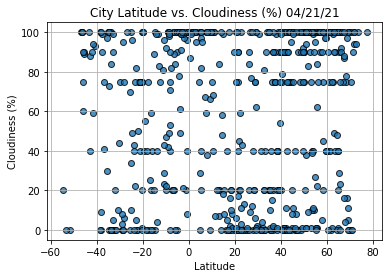

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

#### Scatter Plot for Latitude vs. Wind Speed

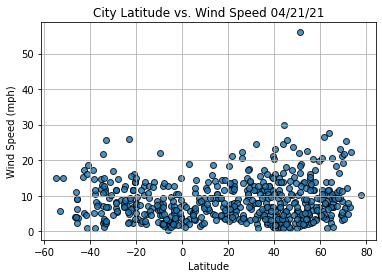

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Determine Correlations

### Find the Correlation Between Latitude and Maximum Temperature

#### Create a Linear Regression Function

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

#### Create the Hemisphere DataFrames

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Lazaro Cardenas,MX,2021-04-21 06:53:32,17.9583,-102.2000,69.82,70,2,3.74
4,Jamestown,US,2021-04-21 06:52:43,42.0970,-79.2353,33.01,93,90,11.50
10,Makakilo City,US,2021-04-21 06:52:11,21.3469,-158.0858,78.01,69,90,6.29
13,Velingara,SN,2021-04-21 06:53:34,13.1500,-14.1167,73.31,53,7,4.90
17,Hamilton,US,2021-04-21 06:52:27,39.1834,-84.5333,33.01,93,90,11.50


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

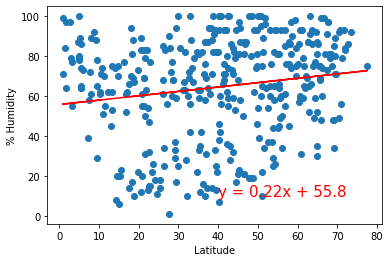

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

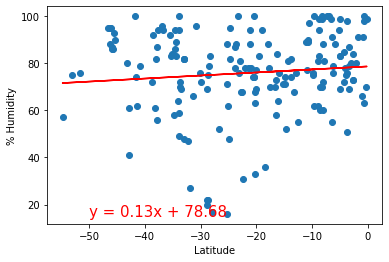

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### Find the Correlation Between Latitude and Percent Humidity

#### Perform Linear Regression on the Percentage of Humidity for the Northern Hemisphere

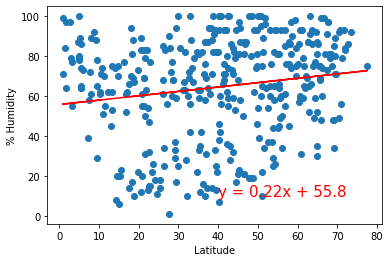

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

#### Perform Linear Regression on the Percentage Humidity for the Southern Hemisphere

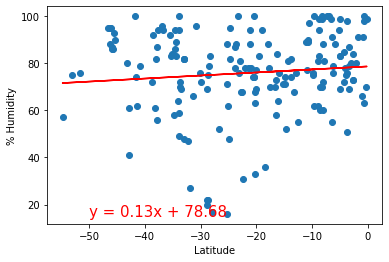

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### Find the Correlation Between Latitude and Percent Cloudiness

#### Perform Linear Regression on Percentage of Cloudiness for the Northern Hemisphere

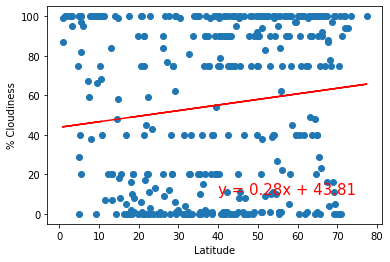

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

#### Perform Linear Regression on Percentage of Cloudiness for the Southern Hemisphere

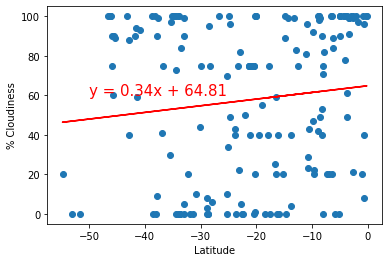

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

### Find the Correlation Between Latitude and Wind Speed

#### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

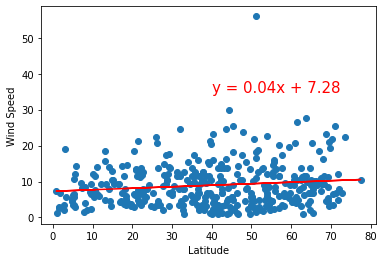

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
